<a href="https://colab.research.google.com/github/sinue111/Proyecto-introducci-n-a-Python-/blob/main/proyecto_data_scince.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importa las librerias a utilizar

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Se carga el dataframe




In [11]:
df = pd.read_csv("synergy_logistics_database.csv")

In [12]:
def agrupacion(Data,list_criterios,Colum_sum):
  suma=Data.groupby(list_criterios)[Colum_sum].sum()
  cuenta=Data.groupby(list_criterios)[Colum_sum].count()
  promedio=Data.groupby(list_criterios)[Colum_sum].mean()
  return suma,cuenta,promedio

##Creo filtros 
###1)filtro_año: se ingresa el año que se desea filtrar
###2)flitro_transporte: filtra el trnasporte
###3)flitro_direction : filtra por dirección
###4)registro_unico: creo una funcion de registro unico pido la columna a encontrar registros unicos


In [13]:
registro_unico=lambda nombre_de_la_columna:list(nombre_de_la_columna.unique())
filtro_año=lambda df,año:df[df.year.isin([año])] 
flitro_transporte=lambda df,tipo:df[df.transport_mode.isin([tipo])] 
flitro_direction=lambda df,direccion:df[df.direction.isin([direccion])]

##Especifico que la columna de fehcas ("date") sera escitra como fechas y además pongo que el primer número corresponde a el día del mes

In [14]:
df["date"]=pd.to_datetime(df["date"],dayfirst=True)

##Ocupo los filtros para empezar a filtrar los datos

In [15]:
ventas_por_dia=agrupacion(df,["transport_mode","date"],["total_value"])[0]
ventas_por_dia=ventas_por_dia.reset_index(inplace=True)
print(ventas_por_dia)
meses_ventas_total=ventas_por_dia.resample('m', on='date').total_value.sum()
meses_ventas_total=pd.DataFrame(meses_ventas_total)
meses_ventas_total=meses_ventas_total.reset_index(inplace=False)
print(meses_ventas_total)

#año_ventas_total=df.resample('y', on='date').total_value.sum()
#print(type(año_ventas_total))
#año_ventas_total.reset_index(inplace=True)
#print(año_ventas_total)

None


AttributeError: ignored

####Opción 1) Rutas de importación y exportación. Synergy logistics está
considerando la posibilidad de enfocar sus esfuerzos en las 10 rutas más
demandadas. Acorde a los flujos de importación y exportación, ¿cuáles son esas
10 rutas? ¿le conviene implementar esa estrategia? ¿porqué?

##Las mejores 10 rutas

###sort_values(by="total_value",ascending=False): se ordena de descendente



In [25]:
def s_c_m(numero): 
  datos=agrupacion(df,['origin','destination','direction'],['total_value'])[numero].sort_values(by="total_value",ascending=False)
  datos=datos.reset_index(inplace=False)
  datos['%']=round((datos.total_value/sum(datos.total_value))*100,2)
  top_10=datos.head(n=10)
  print(top_10)
  plt.figure(figsize = (16,9))
  plt.xticks(rotation=45)
  sns.barplot(datos.origin,datos.total_value,hue=datos.direction)
  suma_top10=sum(top_10["%"])
  if numero==0:
    print("Las 10 primeras rutas abarcan el",round(suma_top10,2),"% del total de ingresos")
    plt.title("total de ingresos")
  elif numero==1:
    print("Las 10 primeras rutas abarcan el",round(suma_top10,2),"% del total de numero de ventas")
    plt.title("total de numero de ventas")
  elif numero==2:
    print("Las 10 primeras rutas abarcan el",round(suma_top10,2),"% del total de ventas promedio")
    plt.title("total de ventas promedio")






##SUMA DEL TOTAL DE VENTAS DE IMPORACIONES Y EXPORTACIONES
#### SE PUEDE OBSERVAR QUE EL 28.42% DE LAS VENTAS SON EXPORTACIONES POR LO TANTO SI CONVENDRÍA INVERTIR SI ESTO SE CONDIDERA LA MEJOR RUTA ES LA DE EXPORTACIÓN DE CHINA A MÉXICO CON UN 5.68%
####SE OBSERVA QUE EL PUESTO 1 EN EXPORTACIONES ES DE CHINA Y DE IMPORTACIONES ES SINGAPURE EN TOTAL DE VENTAS

        origin     destination direction  total_value     %
0        China          Mexico   Exports  12250000000  5.68
1       Canada          Mexico   Exports   8450000000  3.92
2  South Korea         Vietnam   Exports   6877007000  3.19
3       France         Belgium   Exports   5538069000  2.57
4       France  United Kingdom   Exports   5427000000  2.52
5        China     South Korea   Exports   4790000000  2.22
6          USA          Mexico   Exports   4710000000  2.18
7  South Korea           Japan   Exports   4594000000  2.13
8      Germany           Italy   Exports   4541000000  2.11
9        China         Germany   Exports   4090000000  1.90


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Las 10 primeras rutas abarcan el 28.42 % del total de ingresos


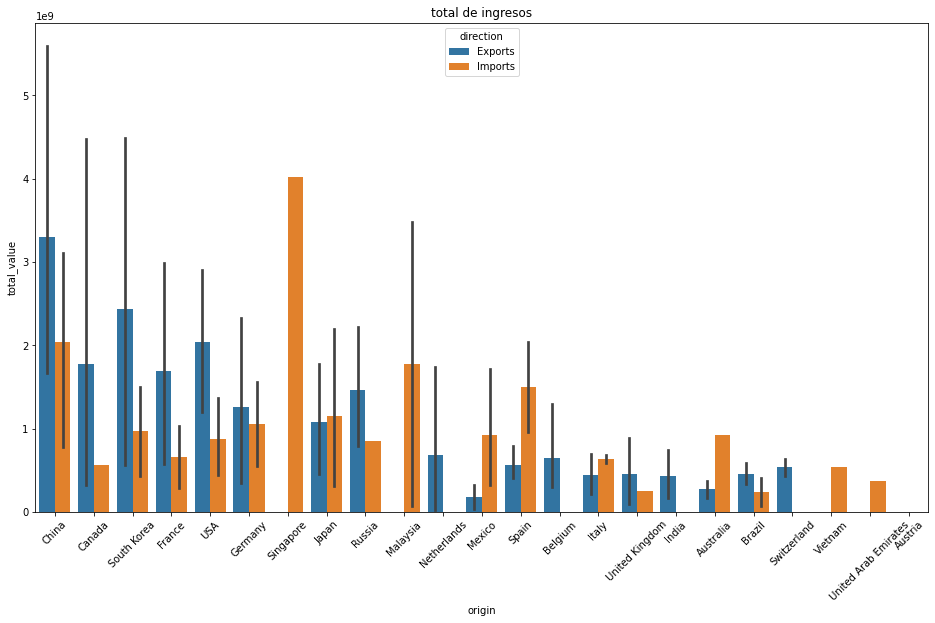

In [17]:
s_c_m(0)

###CUENTA DEL TOTAL DE VENTAS DE IMPORACIONES Y EXPORTACIONES

####Si contemplamos la cantidad de ventas que se hacen en función del destino podemos observar que South Korea-Vietnam es el que mas ventas hace como exportaciones y es el 3er lugar en recaudo de ventas, Canada-Mexico en exportación es el 10mo lugar en ventas pero el segundo lugar en recaudación, pero aqui existe un problema el total de las ventas las 10 primeras rutas contando exportaciones e importaciones solo abarca el 17.79 del número de ventas totales .
#### sSE OBSERVA QUE EL PAIS CON MAYOR NÚMERO DE VENTAS ES SINGAPORE EN IMPORTACIONES Y SOUTH KOREA EN EXPORTACIONES




        origin  destination direction  total_value     %
0  South Korea      Vietnam   Exports          497  2.61
1  Netherlands      Belgium   Exports          437  2.29
2          USA  Netherlands   Exports          436  2.29
3        China       Mexico   Exports          330  1.73
4        Japan       Brazil   Exports          306  1.61
5      Germany       France   Exports          299  1.57
6  South Korea        Japan   Exports          279  1.46
7    Australia    Singapore   Exports          273  1.43
8    Singapore     Thailand   Imports          273  1.43
9       Canada       Mexico   Exports          261  1.37


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Las 10 primeras rutas abarcan el 17.79 % del total de numero de ventas


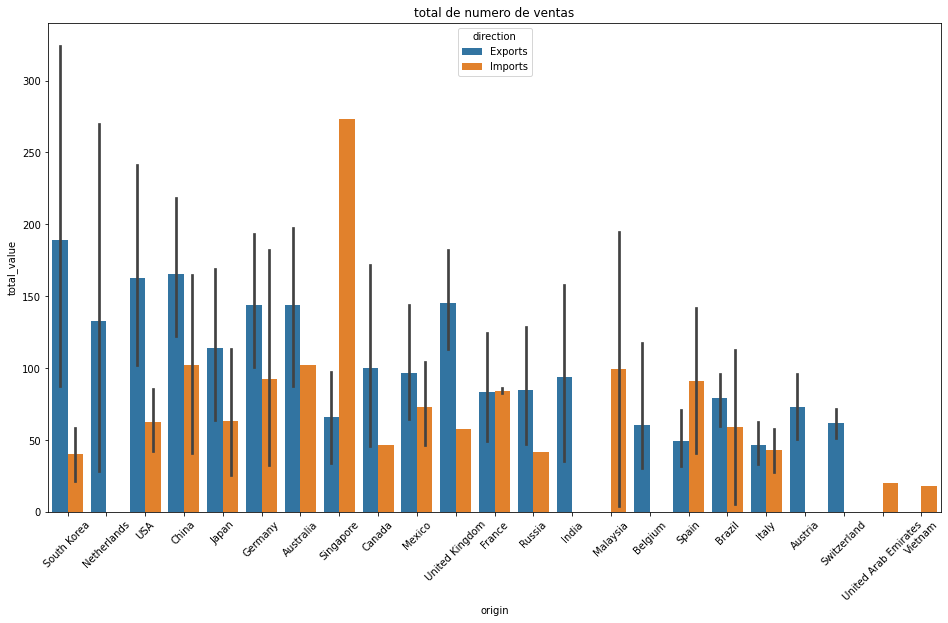

In [18]:
s_c_m(1)

PROMEDIO DEL TOTAL DE VENTAS DE IMPORACIONES Y EXPORTACIONES
####EN VENTAS PROMEDIO POR RUTAS DE PAISES PODEMOS VER QUE VIETNAM TIENE MEJOR PROMEDIO EN IMPORTACIONES Y CHINA TIENE MEJOR PROMEDIO EN EXPORTACIONES.
####EN VENTAS PROMEDIO EN LOS PAISES ABARCAN EL 15.85% DE VENTAS PROMEDIO 

        origin           destination direction   total_value     %
0        China                Mexico   Exports  3.712121e+07  1.73
1       France                 Italy   Exports  3.704348e+07  1.73
2       France        United Kingdom   Exports  3.691837e+07  1.72
3      Germany                 Italy   Exports  3.493077e+07  1.63
4        China                   USA   Exports  3.420721e+07  1.59
5  South Korea  United Arab Emirates   Imports  3.358824e+07  1.56
6       France                   USA   Exports  3.302913e+07  1.54
7       Canada                Mexico   Exports  3.237548e+07  1.51
8        Japan                   USA   Imports  3.100000e+07  1.44
9      Vietnam  United Arab Emirates   Imports  3.000000e+07  1.40


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Las 10 primeras rutas abarcan el 15.85 % del total de ventas promedio


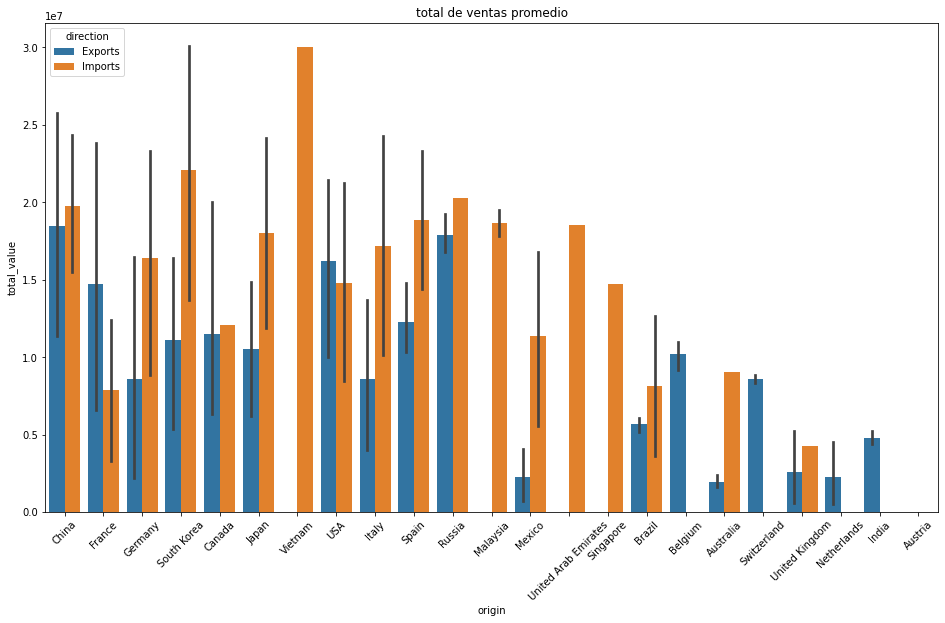

In [19]:
s_c_m(2)

####Opción 2) Medio de transporte utilizado. ¿Cuáles son los 3 medios de transporte
más importantes para Synergy logistics considerando el valor de las
importaciones y exportaciones? ¿Cuál es medio de transporte que podrían
reducir?
#####El transporte que se reduce seria el terrestre porque genera el 15.42% del total en comparacion con los demás que generan, el medio predominante es el medio matitimo en todos los años
####medio maritimo 46.6%
####tren 20.22%
####aereo 17.73%
####El transporte de mar ha evolucionado respecto al tiempo ya que la cantidad de dinero recaudado ha ido a la alza sin embargo el transporte de camino ha tenido dificulatades  como se puede observar en los gráficos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Total de ingresos por tipo de transporte
  transport_mode   total_value      %
0            Sea  100530622000  46.61
1           Rail   43628043000  20.23
2            Air   38262147000  17.74
3           Road   33270486000  15.43


Total de ingresos por tipo de transporte
   transport_mode  year  total_value     %
0             Sea  2020  19856190000  9.21
1             Sea  2016  18500041000  8.58
2             Sea  2019  18486953000  8.57
3             Sea  2018  17542148000  8.13
4             Sea  2017  14838463000  6.88
5             Sea  2015  11306827000  5.24
6            Rail  2018  10632394000  4.93
7            Rail  2020   9911363000  4.60
8             Air  2017   9065068000  4.20
9             Air  2019   9037995000  4.19
10           Road  2019   8732171000  4.05
11           Rail  2017   8483234000  3.93
12           Road  2015   8231077000  3.82
13            Air  2020   7219599000  3.35
14            Air  2015   7023000000  3.26
15           Road  2018   6502062000  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Total de ventas promedio por tipo de transporte
  transport_mode   total_value      %
0            Air  1.601597e+07  31.32
1           Rail  1.290389e+07  25.24
2           Road  1.280619e+07  25.05
3            Sea  9.405934e+06  18.40


Total de ventas promedio por tipo de transporte
   transport_mode  year   total_value     %
0             Air  2019  2.524580e+07  8.15
1             Air  2020  1.999889e+07  6.46
2            Road  2017  1.839640e+07  5.94
3            Rail  2020  1.702983e+07  5.50
4             Air  2017  1.691244e+07  5.46
5             Air  2015  1.684173e+07  5.44
6            Rail  2018  1.419545e+07  4.58
7            Rail  2019  1.373714e+07  4.44
8            Road  2016  1.369212e+07  4.42
9            Road  2015  1.351573e+07  4.36
10           Road  2019  1.307211e+07  4.22
11           Rail  2017  1.285338e+07  4.15
12            Sea  2018  1.188492e+07  3.84
13           Road  2018  1.169436e+07  3.78
14            Air  2016  1.087771e+07  3.51
15      

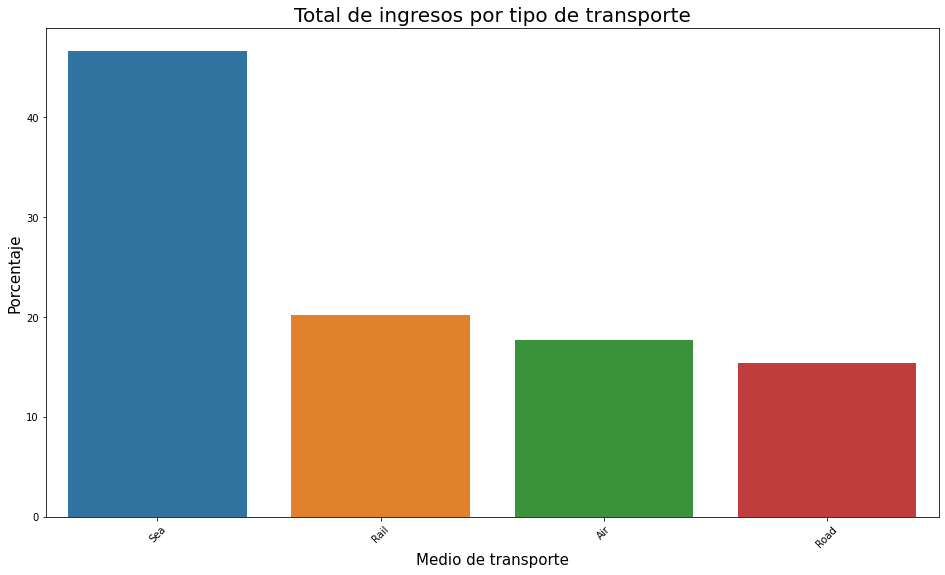

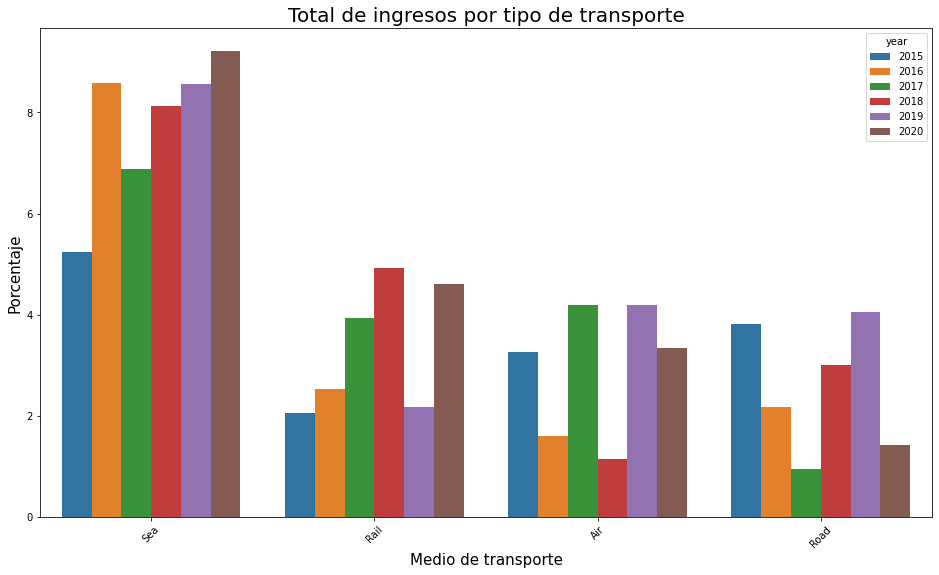

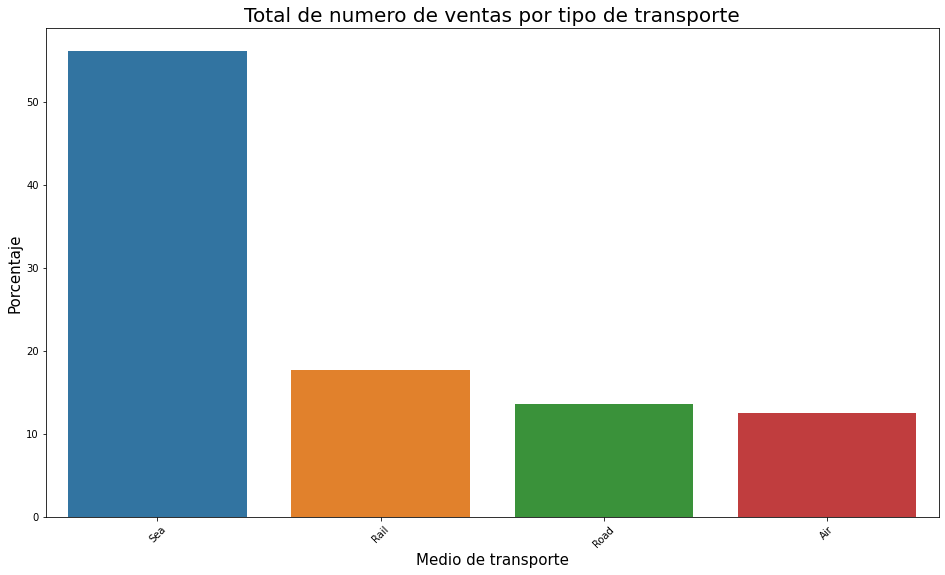

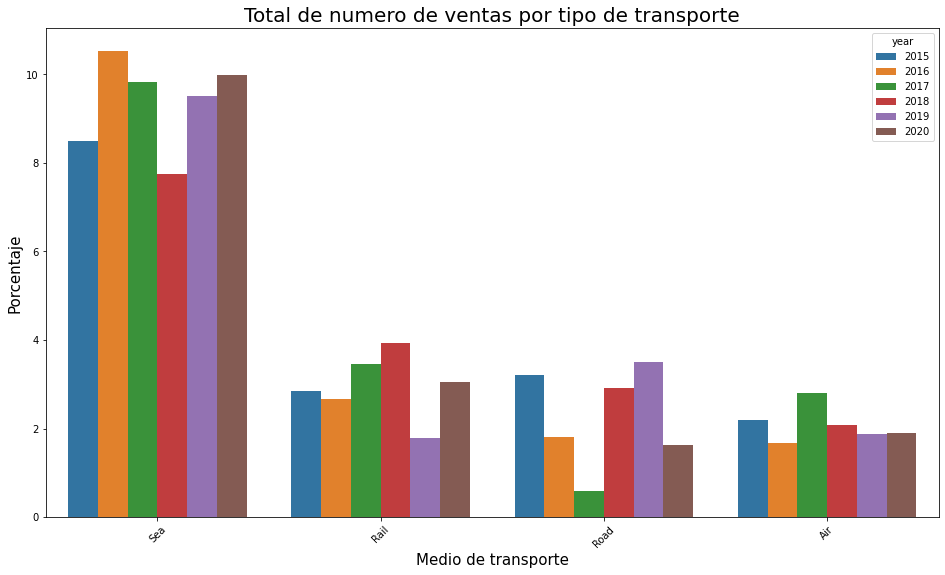

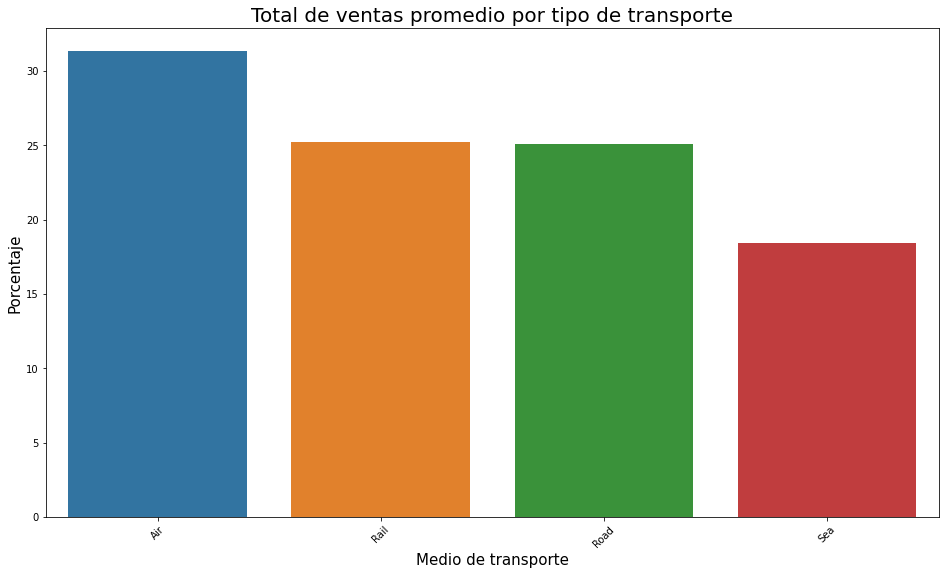

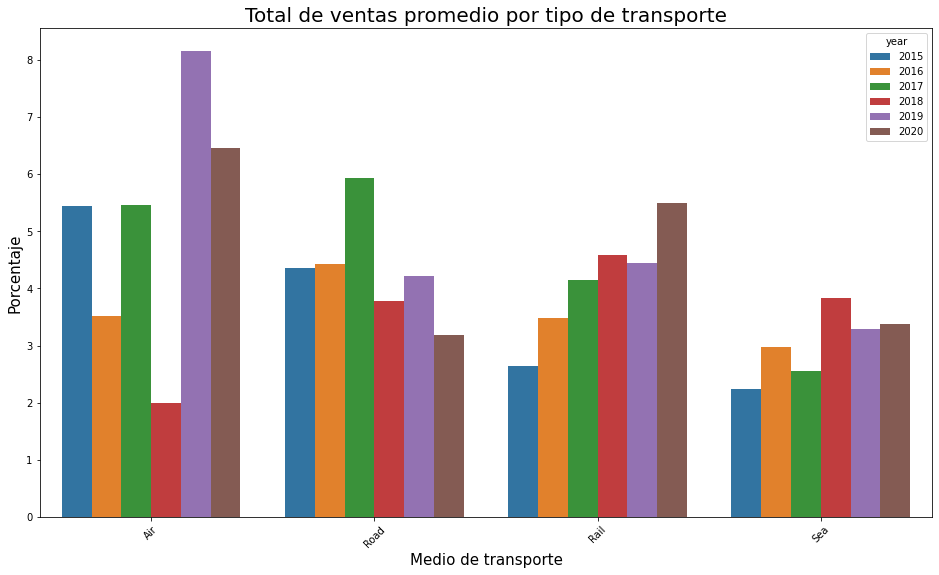

In [21]:
def medio_de_transporte(numero,año):
  if "no"==año:
    datos=agrupacion(df,["transport_mode"],['total_value'])[numero].sort_values(by="total_value",ascending=False)
  elif "si"==año:
    datos=agrupacion(df,["transport_mode","year"],['total_value'])[numero].sort_values(by="total_value",ascending=False)
  datos=datos.reset_index(inplace=False)
  datos["%"]=round(datos.total_value*100/datos.total_value.sum(),2)
  plt.figure(figsize = (16,9))
  plt.xticks(rotation=45)

  if "no"==año:
    sns.barplot(datos.transport_mode,datos["%"])
  elif "si"==año:
    sns.barplot(datos.transport_mode,datos["%"],hue=datos.year)
  if numero==0:
    titulo="Total de ingresos por tipo de transporte"
    plt.title(titulo,fontsize=20)
    print(titulo)
    print(datos)
  elif numero==1:
    titulo="Total de numero de ventas por tipo de transporte"
    plt.title(titulo,fontsize=20)
    print(titulo)
    print(datos)
  elif numero==2:
    titulo="Total de ventas promedio por tipo de transporte"
    plt.title(titulo,fontsize=20)
    print(titulo)
    print(datos)
  plt.xlabel('Medio de transporte', fontsize=15)
  plt.ylabel('Porcentaje', fontsize=15)
for i in range(3):
  medio_de_transporte(i,"no")
  print("\n")
  medio_de_transporte(i,"si")
  print("\n")


#Opción 3) Valor total de importaciones y exportaciones. Si Synergy Logistics quisiera enfocarse en los países que le generan el 80% del valor de las exportaciones e importaciones ¿en qué grupo de países debería enfocar sus esfuerzos?
###1)China
###2)USA
###3)Japon
###4)Francia
###5)Corea del sur
###6)Alemania 
###7)Rusia 
###8)Canada

###Creo las columnas de Países porcentaje de ventas y despues creo una lista de frecuencia acumulada para poder hacer el flitro del 80% del total de ventas de que paises proviene

In [22]:

datos=agrupacion(df,"origin",["total_value"])[0].sort_values(by="total_value",ascending=False)
datos=datos.reset_index(inplace=False)
datos["Paises % ventas"]=round(datos.total_value*100/datos.total_value.sum(),4)
print(datos["Paises % ventas"].sum())
print(datos)

99.99989999999998
                  origin  total_value  Paises % ventas
0                  China  45210046000          20.9605
1                    USA  23646306000          10.9630
2                  Japan  20042976000           9.2924
3                 France  19930332000           9.2402
4            South Korea  18510146000           8.5818
5                Germany  15593233000           7.2294
6                 Russia  14074000000           6.5251
7                 Canada  11253000000           5.2172
8                  Italy   6634684000           3.0760
9                  Spain   6419000000           2.9760
10                Mexico   6040755000           2.8006
11           Netherlands   4120369000           1.9103
12             Singapore   4017684000           1.8627
13              Malaysia   3560000000           1.6505
14        United Kingdom   3025612000           1.4028
15                Brazil   2763000000           1.2810
16                 India   2626000000          

In [23]:
lista=[]
for i in range(len(datos["Paises % ventas"])):
  if i==0:
    lista.append(datos["Paises % ventas"][i])
  elif i<len(datos["Paises % ventas"]):
    lista.append(lista[i-1]+datos["Paises % ventas"][i])
print(len(lista))
datos=datos.assign(Frec_acu=lista)
print(datos[datos["Frec_acu"]<80])



23
        origin  total_value  Paises % ventas  Frec_acu
0        China  45210046000          20.9605   20.9605
1          USA  23646306000          10.9630   31.9235
2        Japan  20042976000           9.2924   41.2159
3       France  19930332000           9.2402   50.4561
4  South Korea  18510146000           8.5818   59.0379
5      Germany  15593233000           7.2294   66.2673
6       Russia  14074000000           6.5251   72.7924
7       Canada  11253000000           5.2172   78.0096


#Extra 
##En su conjunto                  
###0                        Cars  0.179281
###1                   Computers  0.111071
###2             Pharmaceuticals  0.085682
###3   Machinery and electronics  0.077040
###4         Integrated circuits  0.066489
###5                 Smartphones  0.064120
###6             Aerospace Parts  0.051339
###7             Crude Petroleum  0.040479
###8                   Cosmetics  0.039182
###9                        Gold  0.035699
###10        Industrial machines  0.033761
###11                      otros  0.215858
###Debe considerar tambien los 11 productos mas vendidos para considerar una alternativa viable en otros se toman en cuenta aquellos productos que recaudan menos del 3% del total de ventas 

Estos productos en su conjunto abarcan el  21.59 % del total de ingresos
Wood
Meat
Cereals
Tires
Vehicle parts
Optical readers
Palm oil
Vegetables
Dairy
Raw sugar
Gas turbines
Coal Briquettes
Rice
Refined Petroleum
Clothing
Fish flour
Diamonds
                      product  total_value  porcentaje
0                        Cars  38669250000    0.179281
1                   Computers  23957000000    0.111071
2             Pharmaceuticals  18480873000    0.085682
3   Machinery and electronics  16616843000    0.077040
4         Integrated circuits  14341146000    0.066489
5                 Smartphones  13830046000    0.064120
6             Aerospace Parts  11073306000    0.051339
7             Crude Petroleum   8731000000    0.040479
8                   Cosmetics   8451185000    0.039182
9                        Gold   7700000000    0.035699
10        Industrial machines   7282000000    0.033761
11                      otros  46558649000    0.215858


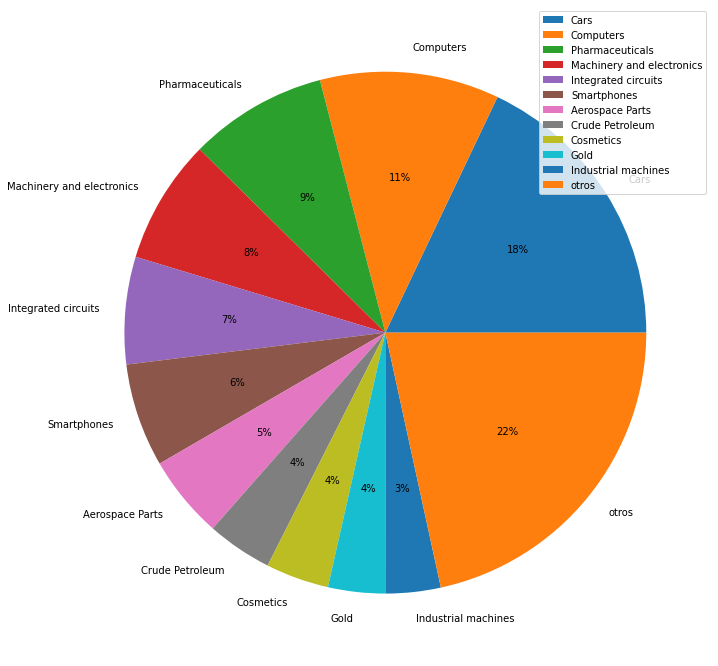

In [37]:
productos=agrupacion(df,["product"],['total_value'])[0].sort_values(by="total_value",ascending=False)
productos["porcentaje"]=productos.total_value/sum(df.total_value)
productos.reset_index(inplace=True)
#print(productos)
grafica_pie=productos[productos["porcentaje"]>0.03]
otros=productos[productos["porcentaje"]<0.03].sum()
#Lista de los otros productos
print("Estos productos en su conjunto abarcan el ",round(otros[2]*100,2),"% del total de ingresos")
for producto in list(productos[productos["porcentaje"]<0.03]['product']):
  print(producto)
encabezado=list(grafica_pie)
grafica_pie=grafica_pie.append({ encabezado[0]: 'otros' ,encabezado[1] :otros[1], encabezado[2] :otros[2]} , ignore_index=True)
plt.figure(figsize = (19,12))
print(grafica_pie)
plt.pie(grafica_pie["porcentaje"], labels = grafica_pie["product"], autopct='%.0f%%')
plt.legend()

                product transport_mode  total_value  porcentaje
0                  Cars            Sea  27789335000   12.883846
1             Computers            Air  14974000000    6.942329
2   Integrated circuits            Sea  14341146000    6.648922
3             Computers            Sea   8248000000    3.823984
4                  Cars           Rail   7337844000    3.402012
..                  ...            ...          ...         ...
57                 Meat           Rail    143124000    0.066356
58    Refined Petroleum            Sea    111000000    0.051462
59                 Wood            Sea     60000000    0.027818
60           Vegetables           Rail     30541000    0.014160
61             Clothing            Sea       165000    0.000076

[62 rows x 4 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

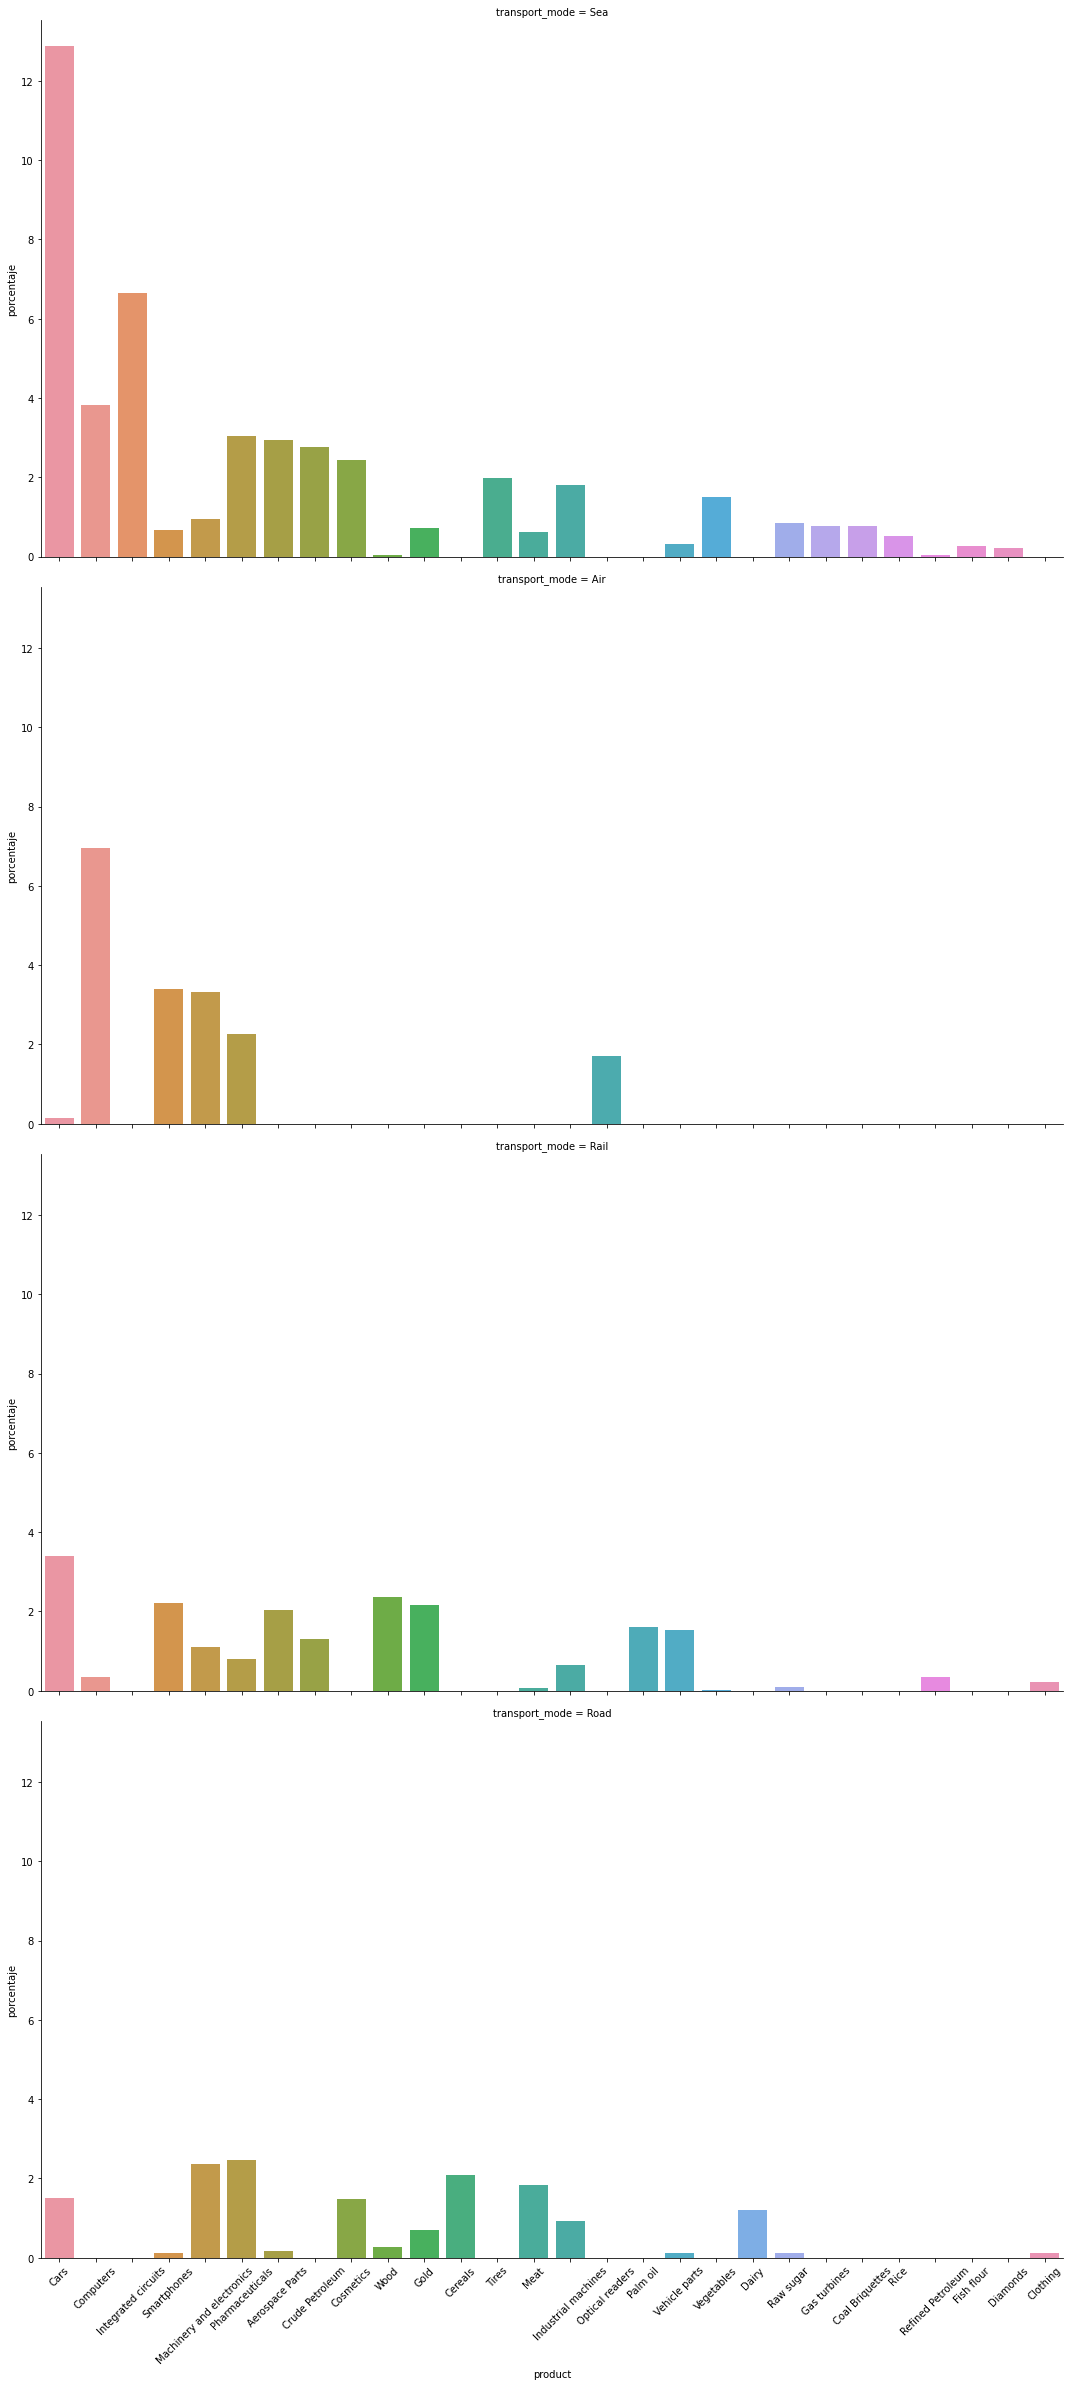

In [92]:
productos=agrupacion(df,["product","transport_mode"],['total_value'])[0].sort_values(by="total_value",ascending=False)
productos["porcentaje"]=productos.total_value*100/sum(df.total_value)
productos.reset_index(inplace=True)
print(productos)

sns.catplot(x="product",y="porcentaje",data=productos,row="transport_mode",kind="bar",height=8, aspect=15/8)

plt.xticks(rotation=45)



#conclusión
##Como se puede observar en las ultimas graficas la empresa debe de considerar tanto el producto que vende y el medio de transporte que vende ya que se aprecia comparando el grafico de pastel y el de barras que los procutos 
##Cars
##Computers 
##Integrated cicuits
##Smarthphones
##Machinery and electronics 
###son los productos mas venditos en su totalidad sin importar el medio y ademas si condideramos el medio tambien concuerda con el de transporte asi que debe de hacer la empresa una estrategia coniderando estos dos factores que son las mas importantes que se puedieron encontrar con base a la visualización de datos  